In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
#df["Exited"].sum()
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [11]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [12]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df = pd.get_dummies(df, columns = ['Gender', 'Geography'])

In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True


In [19]:
df = df.astype(int)

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,1,0,1,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,1,0,1,0,0
3,699,39,1,0,2,0,0,93826,0,1,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0,0,0,1


In [21]:
X = df.drop(columns = ['Exited'])
Y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.25, random_state = 1)

In [22]:
X_train.shape


(7500, 13)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
X_train.shape

(7500, 13)

In [25]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
X_train_scaled

array([[ 0.71997988,  1.25618088,  0.68308948, ...,  1.00080032,
        -0.58207179, -0.57324462],
       [-0.75327193, -0.65952721, -1.39766776, ...,  1.00080032,
        -0.58207179, -0.57324462],
       [ 0.57574543,  0.39411224, -1.39766776, ..., -0.99920032,
        -0.58207179,  1.74445599],
       ...,
       [ 0.22546179,  0.58568305,  1.37667523, ...,  1.00080032,
        -0.58207179, -0.57324462],
       [ 0.13273964,  0.01097062,  1.02988235, ...,  1.00080032,
        -0.58207179, -0.57324462],
       [ 1.16298567,  0.29832684,  0.33629661, ..., -0.99920032,
         1.71800114, -0.57324462]])

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2026-02-11 16:40:46.307063: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770828046.552865      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770828046.620601      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770828047.194548      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770828047.194619      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770828047.194623      17 computation_placer.cc:177] computation placer alr

In [28]:
model = Sequential()

model.add(Dense(13,activation = 'relu', input_dim = 13))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-11 16:41:02.257182: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 378 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [31]:
history = model.fit(X_train_scaled, Y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6911 - loss: 0.6080 - val_accuracy: 0.8013 - val_loss: 0.4667
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7960 - loss: 0.4616 - val_accuracy: 0.8040 - val_loss: 0.4362
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8201 - loss: 0.4210 - val_accuracy: 0.8093 - val_loss: 0.4241
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8278 - loss: 0.4108 - val_accuracy: 0.8147 - val_loss: 0.4152
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4101 - val_accuracy: 0.8187 - val_loss: 0.4080
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8338 - loss: 0.3952 - val_accuracy: 0.8193 - val_loss: 0.3994
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8495 - loss: 0.3788 - val_accuracy: 0.8233 - val_loss: 0.3906
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3692 - val_accuracy: 0.

In [32]:
model.layers[0].get_weights()

[array([[-0.26973525, -0.21141487, -0.10493679, -0.14237294, -0.21410641,
          0.33193168, -0.09103063,  0.04977924,  0.09340791,  0.17814632,
          0.00547255,  0.10502293, -0.2961498 ],
        [-0.13499728, -0.5397855 ,  0.4460453 ,  0.189426  , -0.13089982,
         -0.807229  , -0.5093621 , -0.17395422,  0.50565463,  0.4547091 ,
          0.3777253 , -0.33671603, -0.3923546 ],
        [ 0.16204779, -0.03999582, -0.24923292, -0.15441205, -0.30343673,
         -0.3787005 ,  0.12559208,  0.15583804, -0.10316927, -0.22545438,
         -0.24775426,  0.01523567,  0.36759636],
        [-0.28511333,  0.2645673 , -0.05568801, -0.5137439 ,  0.06231443,
         -0.08507667, -0.26383343, -0.1229891 ,  0.29968315,  0.2650817 ,
         -0.38462076, -0.23446535, -0.1898576 ],
        [-0.22484493, -0.09241195, -0.19931754, -1.3042489 , -0.34971726,
         -0.08781208, -0.02490136, -0.02808431,  0.52679783,  0.77104986,
         -0.10839039,  0.03222151, -0.21326026],
        [-0.173

In [33]:
model.layers[1].get_weights()

[array([[ 0.24843855,  0.43682784,  0.60720825,  0.3667985 , -0.00649047,
         -0.10712139,  0.08271317,  0.31624365,  0.05813297,  0.03521287,
          0.01258132, -0.02225425, -0.1073137 ],
        [-0.54376197, -0.42470273, -0.26824155, -0.5068911 , -0.02495508,
         -0.19274315, -0.1596198 , -0.5125999 ,  0.25004256,  0.11958113,
          0.50950986,  0.39043796,  0.16321637],
        [ 0.21394931, -0.15584369,  0.2230373 , -0.2693116 ,  0.30868006,
         -0.48219928, -0.3690198 , -0.34862706, -0.18267238, -0.4035483 ,
          0.3736292 ,  0.36750534, -0.19937253],
        [ 0.31407082,  0.6274834 , -0.4001052 , -0.20063218,  0.15585671,
          0.05275171, -0.25327203,  0.6210422 , -0.46600983, -0.02413691,
         -0.5042535 , -0.22110777, -0.5220981 ],
        [ 0.3385173 , -0.06375233,  0.09524226,  0.40703362,  0.10119794,
          0.31471905,  0.13998482,  0.325785  ,  0.4631269 , -0.5655228 ,
          0.402965  , -0.05559932, -0.29077217],
        [-0.111

In [34]:
threshold = model.predict(X_test_scaled)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
#to convert from probabilities to no lets take a threshold of 0.5. below it will be 0 and above it will be 1

Y_pred = np.where(threshold > 0.5, 1,0)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8464

In [37]:
import matplotlib.pyplot as plt

In [38]:
#history is an obj while history.history is a dictonary
history.history

{'accuracy': [0.7608333230018616,
  0.8041666746139526,
  0.8173333406448364,
  0.8263333439826965,
  0.8295000195503235,
  0.8335000276565552,
  0.8414999842643738,
  0.8473333120346069,
  0.8489999771118164,
  0.8516666889190674],
 'loss': [0.5375899076461792,
  0.4446788728237152,
  0.4231700897216797,
  0.4127253293991089,
  0.4037770926952362,
  0.39463475346565247,
  0.3852558135986328,
  0.37591472268104553,
  0.36796700954437256,
  0.3614514470100403],
 'val_accuracy': [0.8013333082199097,
  0.8040000200271606,
  0.809333324432373,
  0.8146666884422302,
  0.8186666369438171,
  0.8193333148956299,
  0.8233333230018616,
  0.8320000171661377,
  0.8386666774749756,
  0.8399999737739563],
 'val_loss': [0.46665287017822266,
  0.4361715614795685,
  0.42407429218292236,
  0.4152255058288574,
  0.4079993963241577,
  0.39940717816352844,
  0.390585720539093,
  0.3819279074668884,
  0.37559327483177185,
  0.371046781539917]}

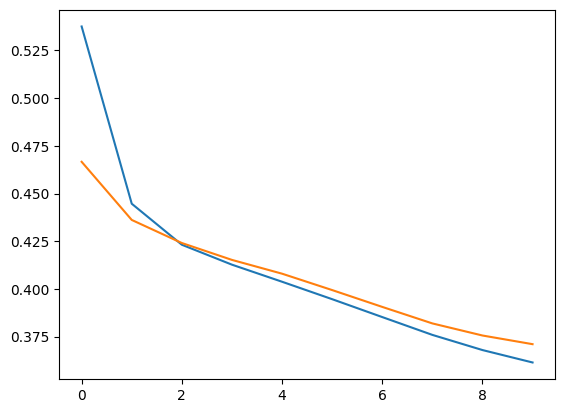

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


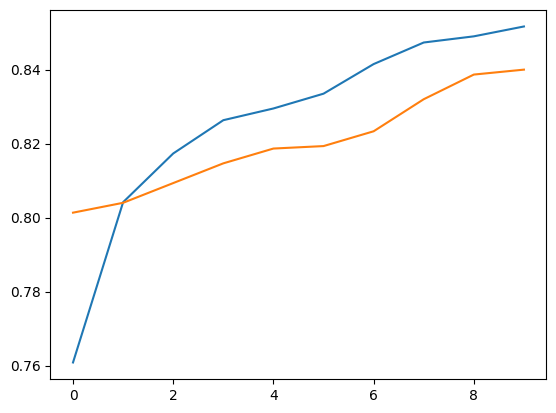

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])